In [1]:
# Initial imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from matplotlib import pyplot
import tensorflow as tf


In [2]:
# import data functions
# imports for creating dataframe
from utils_laramie import get_df, get_all_raw_data

# imports for getting weekly range
from utils_laramie import calc_weekly_range

#imports for grouping data into weekly windows
from utils_laramie import grp_y_wk_d, drop_off_weeks

#shape data
from utils_laramie import get_X_y

In [3]:
# import lstm functions
from lstm_4d import window_data, data_splited_scaled, lstm_model, model_fit, lstm_evaluation, lstm_prediction, predicted_plotting



In [4]:
# get the cleaned data 
df = (get_df(get_all_raw_data()))
df = calc_weekly_range(df)
df = grp_y_wk_d(df)
df = drop_off_weeks(df)
df.tail(10)

,SPY_open,SPY_high,SPY_low,SPY_close,SPY_volume,SPY_trade_count,SPY_vwap,TR,VIX_open,VIX_high,VIX_low,VIX_close,weekly_range
1045,431.58,432.3018,419.36,419.43,131262026.0,1390460.0,424.067609,12.9418,35.88,36.55,32.59,36.45,0.0000
1046,419.87,427.2100,415.12,416.25,158890009.0,1864071.0,419.755053,12.0900,36.19,37.52,32.78,35.13,0.0000
1047,425.16,429.5100,422.83,427.33,110176608.0,1079760.0,426.138376,13.2600,33.74,34.12,31.39,32.45,0.0000
1048,422.42,426.4300,420.44,425.48,91933914.0,891241.0,423.871044,6.8900,33.03,34.03,30.23,30.23,0.0000
1049,428.20,428.7700,419.53,420.07,90803923.0,809145.0,424.040193,9.2400,30.43,31.04,28.84,30.75,17.1818
1050,420.98,424.5500,415.79,417.00,91251505.0,858504.0,419.220077,8.7600,31.03,33.18,30.06,31.77,0.0000
1051,419.66,426.8400,418.42,426.17,104219651.0,920659.0,422.752423,9.8400,33.13,33.83,29.57,29.83,0.0000
1052,429.94,435.6800,424.80,435.55,138130298.0,1344164.0,431.339744,10.8800,29.02,29.80,26.29,26.67,0.0000
1053,433.70,441.0700,433.19,441.07,100157174.0,784018.0,437.706981,7.8800,26.51,27.47,25.25,25.67,0.0000
1054,437.81,444.8600,437.22,444.31,102327793.0,790235.0,441.458916,7.6400,26.36,26.82,23.85,23.87,29.0700


## 3D LSTM Functions
---

In [5]:
# # Set the random seed for reproducibility
# # Note: This is used for model prototyping, but it is good practice to comment this out and run multiple experiments to evaluate your model.
# from numpy.random import seed

# seed(1)
# from tensorflow import random

# random.set_seed(2)

In [6]:
# def window_data(df, window, feature_col_1, feature_col_2, target_col):
#     '''
#     This function accepts the column number for the features (X) and the target (y).
#     It chunks the data up with a rolling window of X(t )- window to predict y(t).
#     It returns two numpy arrays of X and y.
#     '''
#     X = []
#     y = []
#     for i in range(len(df) - window):
#         features = df.iloc[i : (i + window), feature_col_1:feature_col_2]
#         target = df.iloc[(i + window), target_col]
#         y.append(target)
#         X.append(features)
#     return np.array(X), np.array(y).reshape(-1, 1)


In [7]:
# X,y = window_data(df,5,0,7,7)
# print(X[0:5])
# print(y[-5:])


In [8]:
# def data_splited_scaled(df, window, feature_col_1,feature_col_2, target_col):
#     '''
#     This function splits X and y into training and testing sets, scales the data with MinMaxScaler and reshapes features data for the 3 dimentional LSTM model .
#     '''  
#     X, y = window_data(df, window, feature_col_1,feature_col_2, target_col)
#     # Use 70% of the data for training and the remainder for testing
#     split = int(0.7 * len(X))
#     X_train = X[: split]
#     X_test = X[split:]
#     y_train = y[: split]
#     y_test = y[split:]

#     # Create a MinMaxScaler object
#     scaler = MinMaxScaler()

#     # Fit the MinMaxScaler object with the training feature data X_train
#     scaler.fit(X_train.ravel().reshape(-1,1))

#     # Scale the features training and testing sets
#     X_train_scaled= scaler.transform(X_train.ravel().reshape(-1,1))
#     X_test_scaled = scaler.transform(X_test.ravel().reshape(-1,1))

#     # Fit the MinMaxScaler object with the training target data y_train
#     scaler.fit(y_train)

#     # Scale the target training and testing sets
#     y_train_scaled = scaler.transform(y_train)
#     y_test_scaled = scaler.transform(y_test)

#     # Reshape the features for the model
#     feature_num = feature_col_2 - feature_col_1
#     X_train_scaled = X_train_scaled.reshape((X_train.shape[0], X_train.shape[1], feature_num))
#     X_test_scaled = X_test_scaled.reshape((X_test.shape[0], X_test.shape[1], feature_num))

#     return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler

In [9]:
# X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler = data_splited_scaled(df,5,0,7,7)
# print(X_train_scaled.shape)
# print(X_test_scaled.shape)
# print(y_train_scaled.shape)
# print(y_test_scaled.shape)
# print(X_train_scaled[0:5])

In [10]:
# def lstm_model(df, window, feature_col_1, feature_col_2, target_col, number_units):
#     '''
#     This function builds and trains a 3-layer LSTM model to fit the 3 dimentional data.
#     '''
#     X_train_scaled, _, y_train_scaled, _ ,_= data_splited_scaled(df, window,feature_col_1, feature_col_2, target_col)

#     # Define the LSTM RNN model.
#     lstm_model = Sequential()

#     dropout_fraction = 0.2
#     # calculate
#     X_train_scaled, _, _, _ ,_= data_splited_scaled(df, window,feature_col_1, feature_col_2, target_col)
#     # Layer 1
#     feature_num = feature_col_2 - feature_col_1
#     lstm_model.add(LSTM(
#     units=number_units,
#     return_sequences=True,
#     input_shape=(X_train_scaled.shape[1], feature_num))
#     )
#     lstm_model.add(Dropout(dropout_fraction))
#     # Layer 2
#     lstm_model.add(LSTM(units=number_units, return_sequences=True))
#     lstm_model.add(Dropout(dropout_fraction))
#     # Layer 3
#     lstm_model.add(LSTM(units=number_units))
#     lstm_model.add(Dropout(dropout_fraction))
#     # Output layer
#     lstm_model.add(Dense(1))

#     # Compile the lstm_model
#     lstm_model.compile(optimizer="adam", loss="mean_squared_error")

#     # Train the lstm_model
#     lstm_model.fit(X_train_scaled, y_train_scaled, epochs=10, shuffle=False, batch_size=1, verbose=1)
#     return lstm_model
    

In [11]:
# lstm_model(df,5,0,7,7,64)

In [12]:
# def lstm_evaluation(df, window,feature_col_1, feature_col_2, target_col, number_units):
#     '''
#     This function evaluates the 3d LSTM model
#     '''
#     _, X_test_scaled, _, y_test_scaled,_ =data_splited_scaled(df, window, feature_col_1, feature_col_2, target_col)
#     model = lstm_model(df, window, feature_col_1, feature_col_2, target_col, number_units)
#     score = model.evaluate(X_test_scaled, y_test_scaled,verbose=0)
#     return score

In [13]:
# lstm_evaluation(df,5,0,7,7,64)

In [14]:
# def lstm_prediction(df, window, feature_col_1, feature_col_2, target_col, number_units):
#     '''
#     This function predicts y values and recover the original prices, and then creates a dataframe of Acural and Predicted values of y
#     '''
#     _, X_test_scaled, _, y_test_scaled,scaler =data_splited_scaled(df, window, feature_col_1, feature_col_2, target_col)
#     model= lstm_model(df, window, feature_col_1, feature_col_2, target_col, number_units)
#     y_predicted = model.predict(X_test_scaled)

#     # Recover the original prices instead of the scaled version
#     predicted_prices = scaler.inverse_transform(y_predicted)
#     actual_prices = scaler.inverse_transform(y_test_scaled.reshape(-1, 1))

#     prediction_df = pd.DataFrame({
#         "actual":actual_prices.ravel(),
#         "predicted":predicted_prices.ravel(),
#     })
    
#     return prediction_df

In [15]:
# prediction_df = lstm_prediction(df,5,0,7,7,64)
# prediction_df

## 4D LSTM Functions

In [16]:
clean_df = pd.read_csv('clean_data/basic_spy_vix.csv')
clean_df = clean_df.drop(columns='Unnamed: 0')
clean_df.head()

,pct_change,day_range,pct_changeVIX,mean_volume,VIX_close,tr_weekly,tr_5,tr_project,day_range_VIX,weekly_range
0,-0.004446,2.5295,0.000908,272.286495,15.84,18.757144,0.00000,0.000000,1.60,0.0000
1,0.002470,2.5090,-0.000436,266.573402,17.60,18.757144,3.31948,3.094519,1.81,0.0000
2,-0.004219,4.5000,0.007565,277.036449,19.61,18.757144,3.66548,3.110070,4.41,0.0000
3,0.002044,2.2900,0.000438,286.743585,19.34,18.757144,3.24370,3.091081,1.59,0.0000
4,-0.007375,4.3500,0.014898,315.219794,24.39,18.757144,3.23570,3.090717,4.39,8.2195


In [17]:
df=clean_df
window =3
chunk_rows=5
number_units=26
optimizer='adam'
loss="msle"
metrics=[tf.keras.metrics.RootMeanSquaredError()]
epochs = 100


In [18]:
# def window_data(df, window, chunk_rows):
#     X_list = df.iloc[:,:-1].values.tolist()
#     X_chunks=[X_list[i:i + chunk_rows] for i in range(0, len(X_list), chunk_rows)]
#     X = [X_chunks[i:i+window] for i in range (len(X_chunks)-window)]
#     y_list=df.iloc[:,-1].values.tolist()
#     y_chunks = [y_list[i + chunk_rows-1] for i in range(0, len(y_list), chunk_rows)]
#     y = [y_chunks[i+window] for i in range(len(y_chunks)-window)]
#     return np.array(X), np.array(y)

In [19]:
X, y = window_data(df, window, chunk_rows)
print(X.shape)
print(y.shape)
print(X[0:5])
print(y[-5:])

(208, 3, 5, 9)
(208,)
[[[[-4.44550669e-03  2.52950000e+00  9.08221797e-04  2.72286495e+02
     1.58400000e+01  1.87571441e+01  0.00000000e+00  0.00000000e+00
     1.60000000e+00]
   [ 2.46997288e-03  2.50900000e+00 -4.35877567e-04  2.66573402e+02
     1.76000000e+01  1.87571441e+01  3.31948000e+00  3.09451931e+00
     1.81000000e+00]
   [-4.21920466e-03  4.50000000e+00  7.56547042e-03  2.77036449e+02
     1.96100000e+01  1.87571441e+01  3.66548000e+00  3.11007045e+00
     4.41000000e+00]
   [ 2.04439252e-03  2.29000000e+00  4.38084112e-04  2.86743585e+02
     1.93400000e+01  1.87571441e+01  3.24370000e+00  3.09108082e+00
     1.59000000e+00]
   [-7.37535648e-03  4.35000000e+00  1.48982201e-02  3.15219794e+02
     2.43900000e+01  1.87571441e+01  3.23570000e+00  3.09071713e+00
     4.39000000e+00]]

  [[-4.86920487e-03  3.59000000e+00 -6.63040663e-03  2.67908297e+02
     2.43000000e+01  1.87571441e+01  3.74400000e+00  3.11356616e+00
     3.56000000e+00]
   [-9.80139283e-04  3.41000000e+0

In [20]:

# def data_splited_scaled(X,y):
#     '''
#     This function splits X and y into training, validation and testing sets, scales the data with MinMaxScaler and reshapes features data for the LSTM model .
#     '''
#     # Use 70% of the data for training and the remainder for testing
#     split = int(0.7 * len(X))
#     X_train = X[: split]
#     split_1 = int(0.7*len(X_train))
#     X_val = X_train[split_1:]
#     X_train = X_train[:split_1]
#     X_test = X[split:]
#     y_train = y[: split]
#     y_val = y_train[split_1:]
#     y_train = y_train[:split_1]
#     y_test = y[split:]

#     # Create a MinMaxScaler object
#     scaler = MinMaxScaler()

#     # Fit the MinMaxScaler object with the training feature data X_train
#     X_scaler = scaler.fit(X_train.ravel().reshape(-1,1))

#     # Scale the features training and testing sets
#     X_train_scaled= X_scaler.transform(X_train.ravel().reshape(-1,1))
#     X_val_scaled= X_scaler.transform(X_val.ravel().reshape(-1,1))
#     X_test_scaled = X_scaler.transform(X_test.ravel().reshape(-1,1))

#     # Fit the MinMaxScaler object with the training target data y_train
#     y_scaler = scaler.fit(y_train.ravel().reshape(-1,1))

#     # Scale the target training and testing sets
#     y_train_scaled = y_scaler.transform(y_train.ravel().reshape(-1,1))
#     y_val_scaled = y_scaler.transform(y_val.ravel().reshape(-1,1))
#     y_test_scaled = y_scaler.transform(y_test.ravel().reshape(-1,1))

#     # Reshape the features for the model
#     X_train_scaled = X_train_scaled.reshape((X_train.shape[:]))
#     X_val_scaled = X_val_scaled.reshape((X_val.shape[:]))
#     X_test_scaled = X_test_scaled.reshape((X_test.shape[:]))

#     return X_train_scaled, X_val_scaled, X_test_scaled, y_train_scaled, y_val_scaled, y_test_scaled, scaler


In [21]:
X_train_scaled, X_val_scaled, X_test_scaled, y_train_scaled, y_val_scaled, y_test_scaled, scaler=data_splited_scaled(X,y)
print(X_train_scaled.shape)
print(X_val_scaled.shape)
print(X_test_scaled.shape)
print(y_train_scaled.shape)
print(y_val_scaled.shape)
print(y_test_scaled.shape)
print(X_train_scaled[0:5])

(101, 3, 5, 9)
(44, 3, 5, 9)
(63, 3, 5, 9)
(101, 1)
(44, 1)
(63, 1)
[[[[6.11668301e-05 4.58671713e-03 7.07284278e-05 4.86364579e-01
    2.83588689e-02 3.35688003e-02 6.91063710e-05 6.91063710e-05
    2.92665815e-03]
   [7.35176681e-05 4.55010475e-03 6.83279068e-05 4.76161168e-01
    3.15021759e-02 3.35688003e-02 5.99759760e-03 5.59582460e-03
    3.30171182e-03]
   [6.15709987e-05 8.10597074e-03 8.26180732e-05 4.94847855e-01
    3.50919753e-02 3.35688003e-02 6.61554317e-03 5.62359846e-03
    7.94523345e-03]
   [7.27575945e-05 4.15897735e-03 6.98887761e-05 5.12184507e-01
    3.46097634e-02 3.35688003e-02 5.86225680e-03 5.58968355e-03
    2.90879845e-03]
   [5.59342067e-05 7.83807526e-03 9.57141430e-05 5.63042157e-01
    4.36289112e-02 3.35688003e-02 5.84796904e-03 5.58903401e-03
    7.90951405e-03]]

  [[6.04101179e-05 6.48073816e-03 5.72646646e-05 4.78545249e-01
    4.34681739e-02 3.35688003e-02 6.75577752e-03 5.62984168e-03
    6.42715907e-03]
   [6.73558718e-05 6.15926359e-03 6.449979

In [22]:
# def lstm_model(X_train_scaled,number_units, optimizer, loss, metrics):
#     '''
#     This function builds a LSTM model

#     '''
#     # Define the LSTM RNN model.
#     lstm_model = Sequential()

#     dropout_fraction = 0.2
#     # Layer 1
#     lstm_model.add(LSTM(
#     units=number_units,
#     # return_sequences=True,
#     input_shape=(X_train_scaled.shape[1],X_train_scaled.shape[2]*X_train_scaled.shape[3])
#     ))
#     lstm_model.add(Dropout(dropout_fraction))
#     # # Layer 2
#     # lstm_model.add(LSTM(units=number_units))
#     # lstm_model.add(Dropout(dropout_fraction))
#     # Output layer
#     lstm_model.add(Dense(1))

#     # Compile the lstm_model
#     lstm_model.compile(optimizer= optimizer, loss=loss, metrics= metrics)

#     return lstm_model


In [23]:
model = lstm_model(X_train_scaled,number_units, optimizer, loss, metrics)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 26)             7488      
                                                                 
 dropout (Dropout)           (None, 3, 26)             0         
                                                                 
 lstm_1 (LSTM)               (None, 3, 26)             5512      
                                                                 
 lstm_2 (LSTM)               (None, 26)                5512      
                                                                 
 dropout_1 (Dropout)         (None, 26)                0         
                                                                 
 dense (Dense)               (None, 1)                 27        
                                                                 
Total params: 18,539
Trainable params: 18,539
Non-traina

In [24]:
# def model_fit(X_train_scaled, y_train_scaled,X_val_scaled, y_val_scaled, model,epochs):
#     '''
#     This function trains the lstm model
#     '''
#     history = model.fit(X_train_scaled.reshape(X_train_scaled.shape[0],X_train_scaled.shape[1],-1), y_train_scaled, validation_data=(X_val_scaled.reshape(X_val_scaled.shape[0],X_val_scaled.shape[1],-1), y_val_scaled), epochs=epochs, shuffle=False, batch_size=1, verbose=1)
#     return (history, model)

In [25]:
history, model_fitted = model_fit(X_train_scaled, y_train_scaled,X_val_scaled, y_val_scaled,model,epochs)

Epoch 1/100
101/101 [==============================] - 8s 25ms/step - loss: 0.0412 - root_mean_squared_error: 0.2579 - val_loss: 0.1567 - val_root_mean_squared_error: 0.5957
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.0412 - root_mean_squared_error: 0.2587 - val_loss: 0.1567 - val_root_mean_squared_error: 0.5957
Epoch 3/100
101/101 [==============================] - 0s 4ms/step - loss: 0.0310 - root_mean_squared_error: 0.2262 - val_loss: 0.0578 - val_root_mean_squared_error: 0.4185
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.0192 - root_mean_squared_error: 0.1856 - val_loss: 0.0659 - val_root_mean_squared_error: 0.4538
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.0189 - root_mean_squared_error: 0.1821 - val_loss: 0.0689 - val_root_mean_squared_error: 0.4603
Epoch 6/100
101/101 [==============================] - 0s 4ms/step - loss: 0.0183 - root_mean_squared_error: 0.1796 - val_loss: 0.0713

In [26]:
# def lstm_evaluation(X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, model_fitted):
#     '''
#     This function evaluates the LSTM model
#     '''
#     train_loss,train_mse,train_mae  = model_fitted.evaluate(X_train_scaled.reshape(X_train_scaled.shape[0],X_train_scaled.shape[1],-1), y_train_scaled,verbose=0)
#     val_loss,val_mse,val_mae  = model_fitted.evaluate(X_val_scaled.reshape(X_val_scaled.shape[0],X_val_scaled.shape[1],-1), y_val_scaled,verbose=0)
#     return train_loss,train_mse,train_mae,val_loss,val_mse,val_mae
    

In [27]:
train_loss,train_rmse,val_loss,val_rmse= lstm_evaluation(X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, model_fitted)


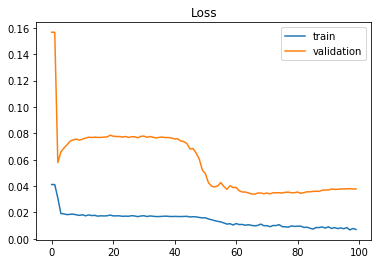

In [43]:

# plot loss during training

pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.savefig('loss.png')


In [29]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

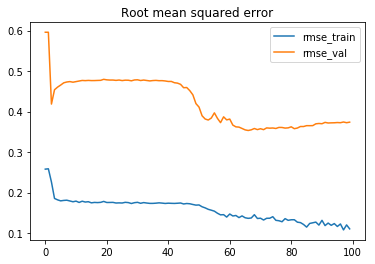

In [49]:

# plot mse during training
pyplot.title('Root mean squared error')
pyplot.plot(history.history['root_mean_squared_error'], label='rmse_train')
pyplot.plot(history.history['val_root_mean_squared_error'], label='rmse_val')
pyplot.legend()
pyplot.savefig('rmse.png')

In [31]:
# # plot mse during training
# pyplot.title('Mean Squared Error')
# pyplot.plot(history.history['rmse'], label='train')
# pyplot.plot(history.history['val_rmse'], label='validation')
# pyplot.legend()
# pyplot.show()

In [32]:
# def lstm_prediction(X_test_scaled, y_test_scaled,model_fitted,scaler):
#     '''
#     This function predicts y values and recover the original prices, and then creates a dataframe of Acural and Predicted values of y
#     '''
#     y_predicted = model_fitted.predict(X_test_scaled.reshape(X_test_scaled.shape[0],X_test_scaled.shape[1],-1))

#     # Recover the original prices instead of the scaled version
#     predicted = scaler.inverse_transform(y_predicted)
#     actual = scaler.inverse_transform(y_test_scaled.reshape(-1, 1))

#     prediction_df = pd.DataFrame({
#         "actual":actual.ravel(),
#         "predicted":predicted.ravel(),
#     })

#     return prediction_df


In [33]:
prediction_df = lstm_prediction(X_test_scaled, y_test_scaled, model_fitted,scaler)
prediction_df['different']=abs(prediction_df['actual']-prediction_df['predicted'])
prediction_df['different'][prediction_df['different']>0].describe()
prediction_df['rmse']=np.sqrt(sum(np.power(prediction_df['predicted']-prediction_df['actual'], 2)/prediction_df['predicted'].count()))
prediction_df

2/2 [==============================] - 3s 6ms/step


,actual,predicted,different,rmse
0,5.9200,15.134729,9.214729,5.419088
1,18.2150,14.435816,3.779184,5.419088
2,24.8100,13.006569,11.803431,5.419088
3,18.9000,14.328630,4.571370,5.419088
4,15.0800,15.944431,0.864431,5.419088
...,...,...,...,...
58,18.3100,13.347476,4.962524,5.419088
59,18.9400,16.796076,2.143924,5.419088
60,13.9000,18.469315,4.569315,5.419088
61,17.1818,20.186352,3.004552,5.419088


In [34]:
# def predicted_plotting(df, ylabel,title):
#     '''
#     This function plots the actual prices vs. the predicted values.
#     '''
#     return df[["actual","predicted"]].plot(
#                     ylabel= ylabel,
#                     title=title
# )

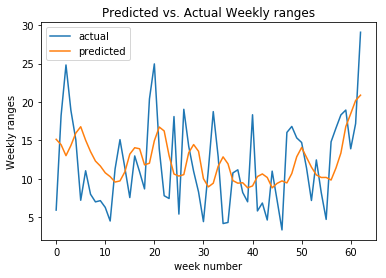

In [46]:
predicted_plotting(prediction_df,'Weekly ranges',"Predicted vs. Actual Weekly ranges")
pyplot.savefig('prediction.png')

# Ploting Funtions
---

In [36]:
# def history_plotting(df, title):

#     '''
#     This function plots the historical data.
#     '''

#     return df.hvplot(
#                     ylabel = 'Price in $',
#                     width= 1000,
#                     height=400,
#                     title=title)
     

In [37]:
# def moving_avgs_plotting(df,ma_column_1, ma_column_2, title):
#     '''
#     This function plots the overlay of the original prices and moving averages.
#     '''
#     prices = df['close'].hvplot(line_color='lightgray',
#                         ylabel='Price in $',
#                         width=1000,
#                         height=400,
#                         title=title
#                         )

#     moving_avgs = df[[ma_column_1, ma_column_2]].hvplot(
#                             ylabel='Price in $',
#                             width=1000,
#                             height=400
#     )   

#     return prices*moving_avgs

    

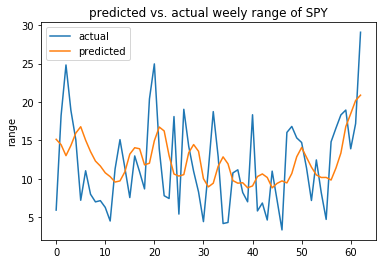

In [38]:
predicted_plotting(prediction_df,'range', 'predicted vs. actual weely range of SPY')

In [39]:
prediction_df['actual'].std()

5.764165862813948

In [40]:
def predicted_plotting(df, ylabel,title):
    '''
    This function plots the actual prices vs. the predicted values.
    '''
    return df[["actual","predicted"]].plot(
                    xlabel= 'week number',
                    ylabel= ylabel,
                    title=title
)

# .axvline(index, color='red',label='prediction start')